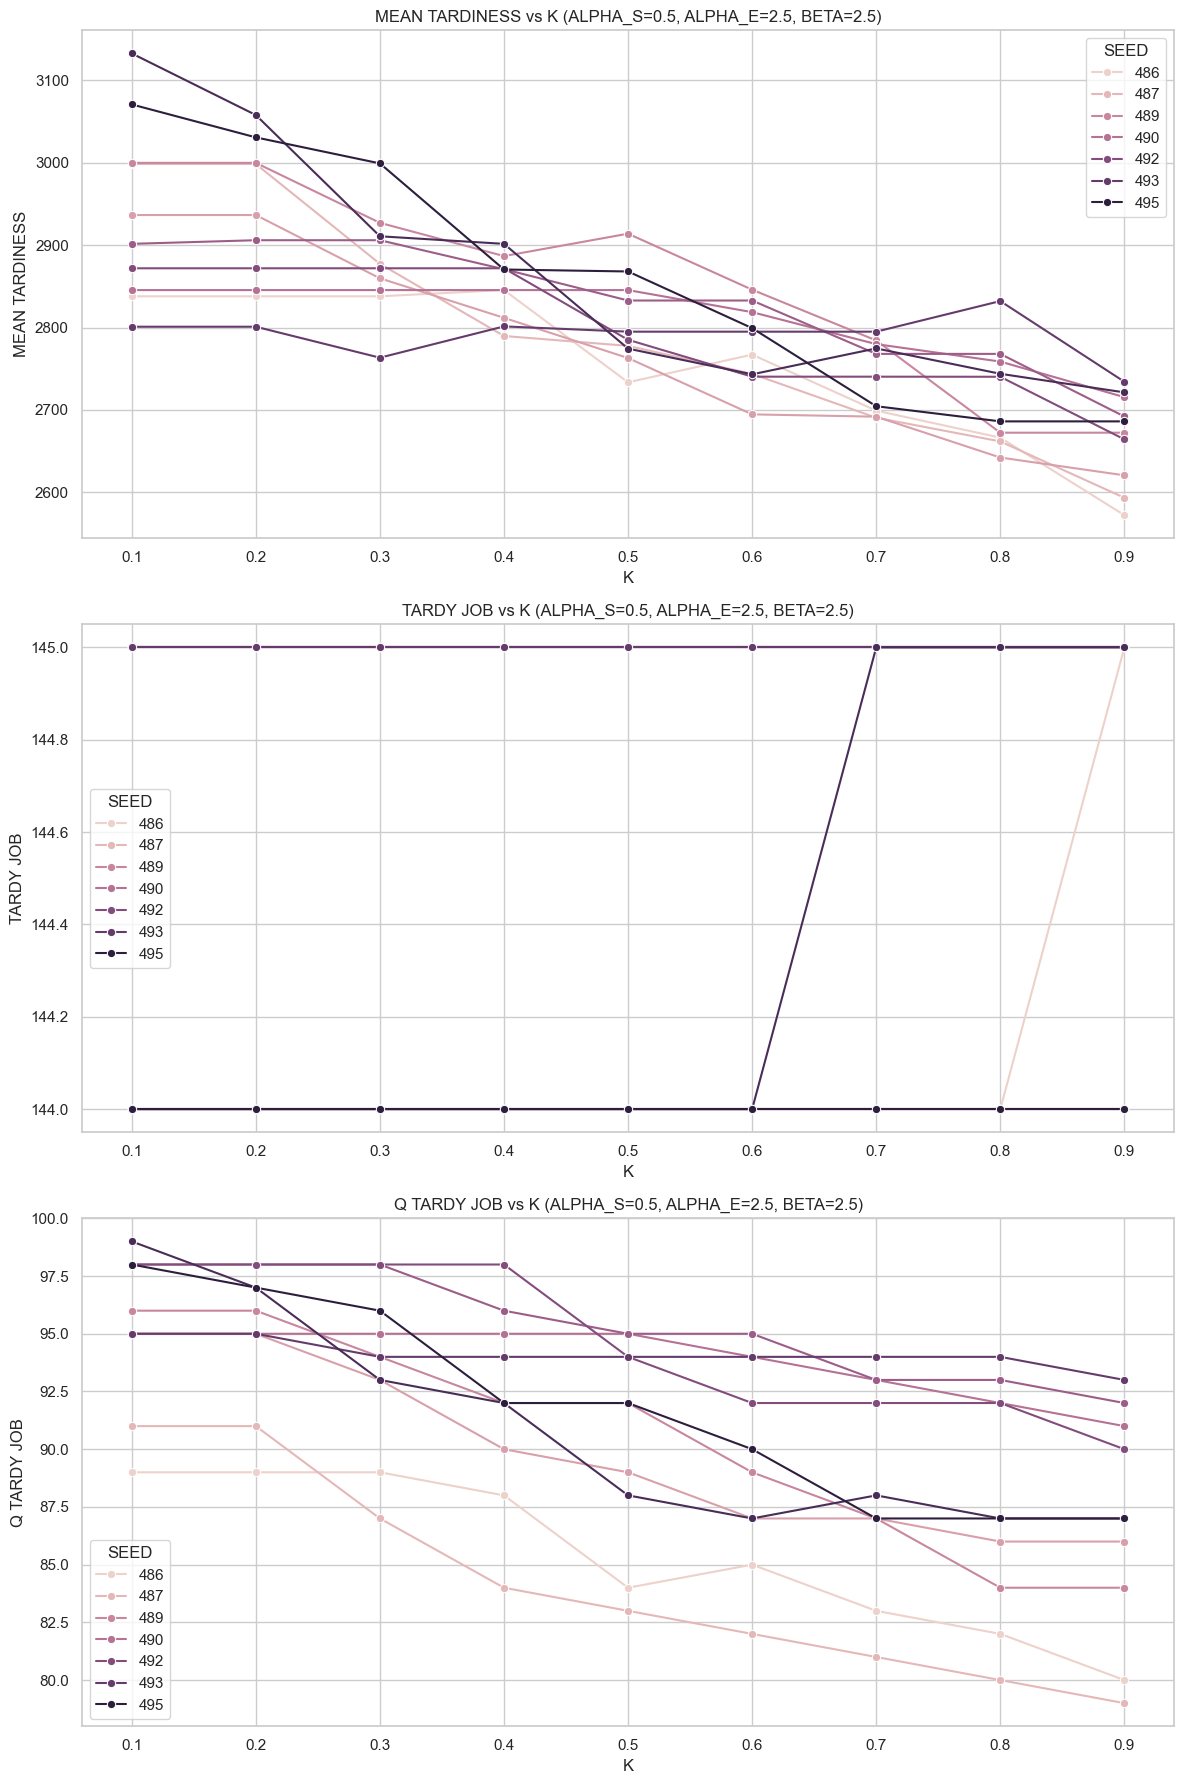

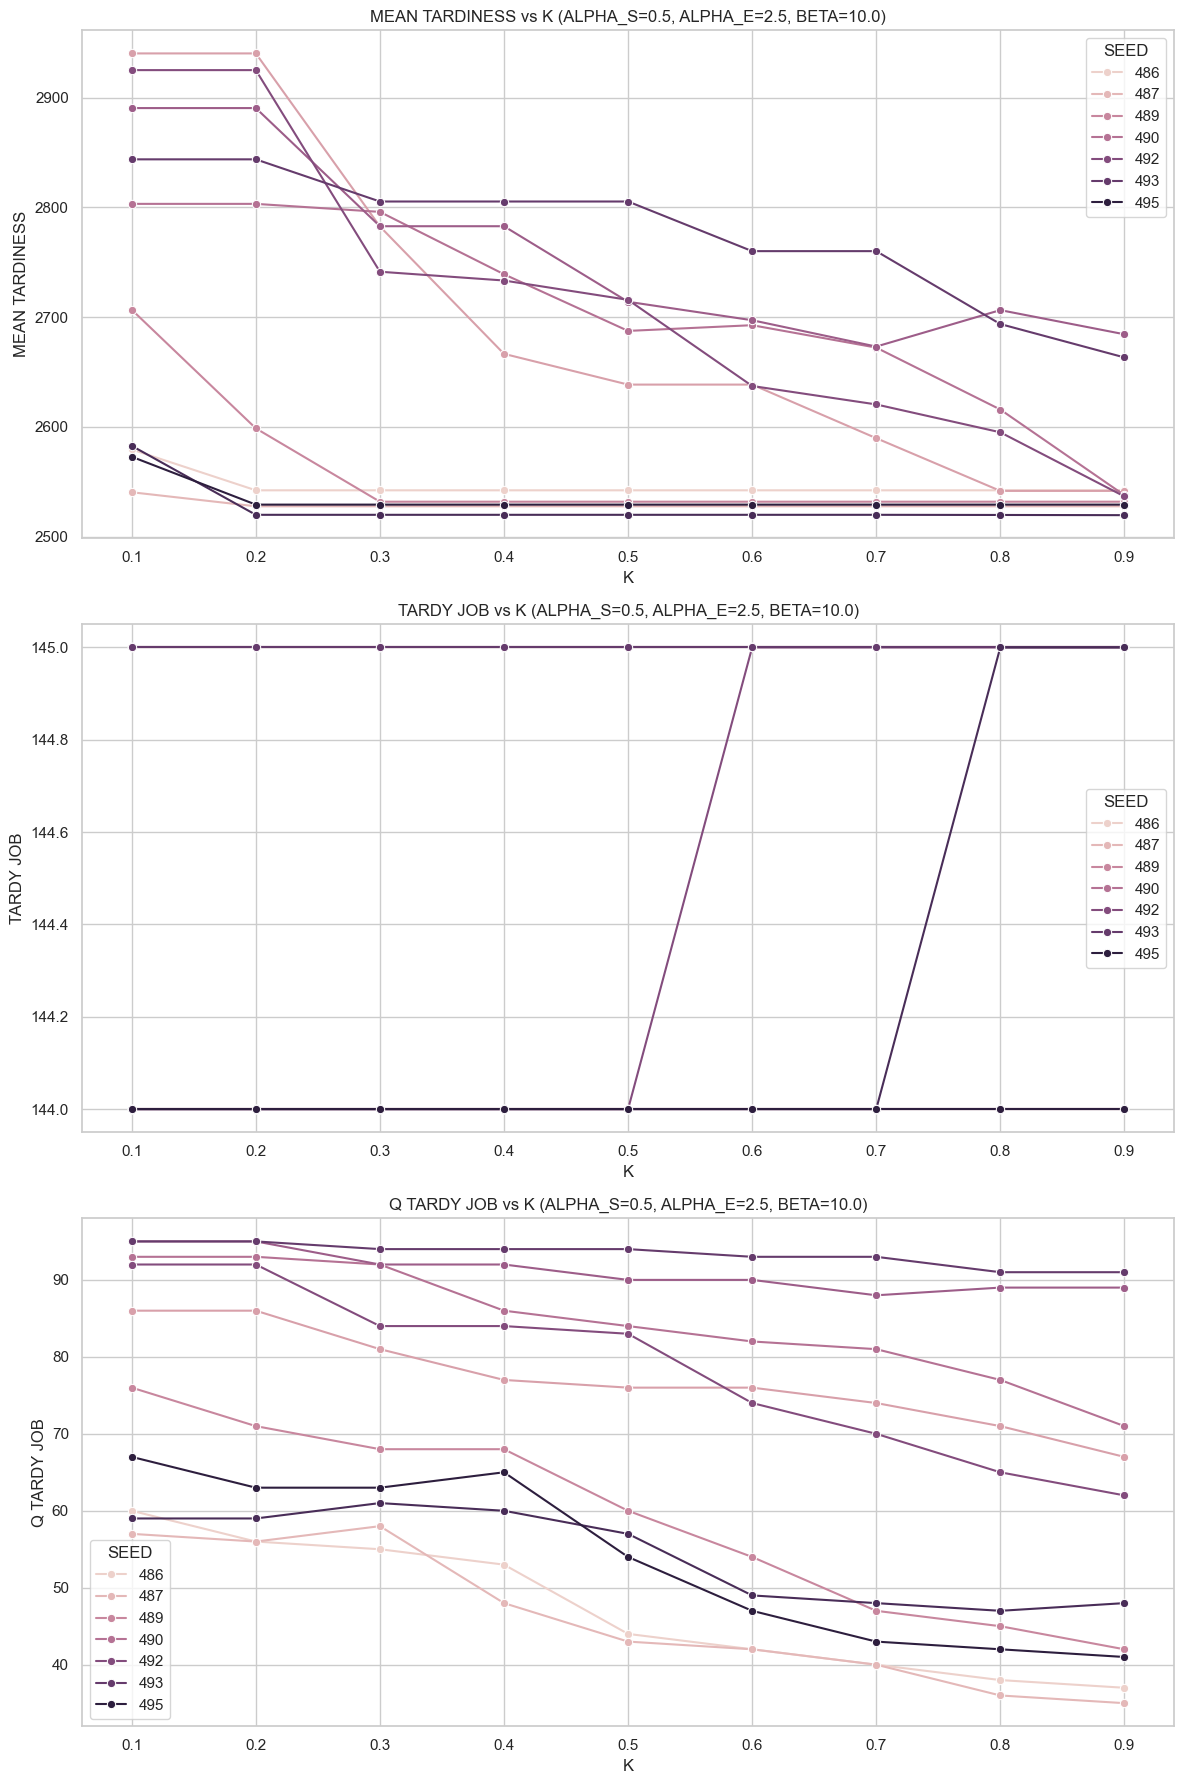

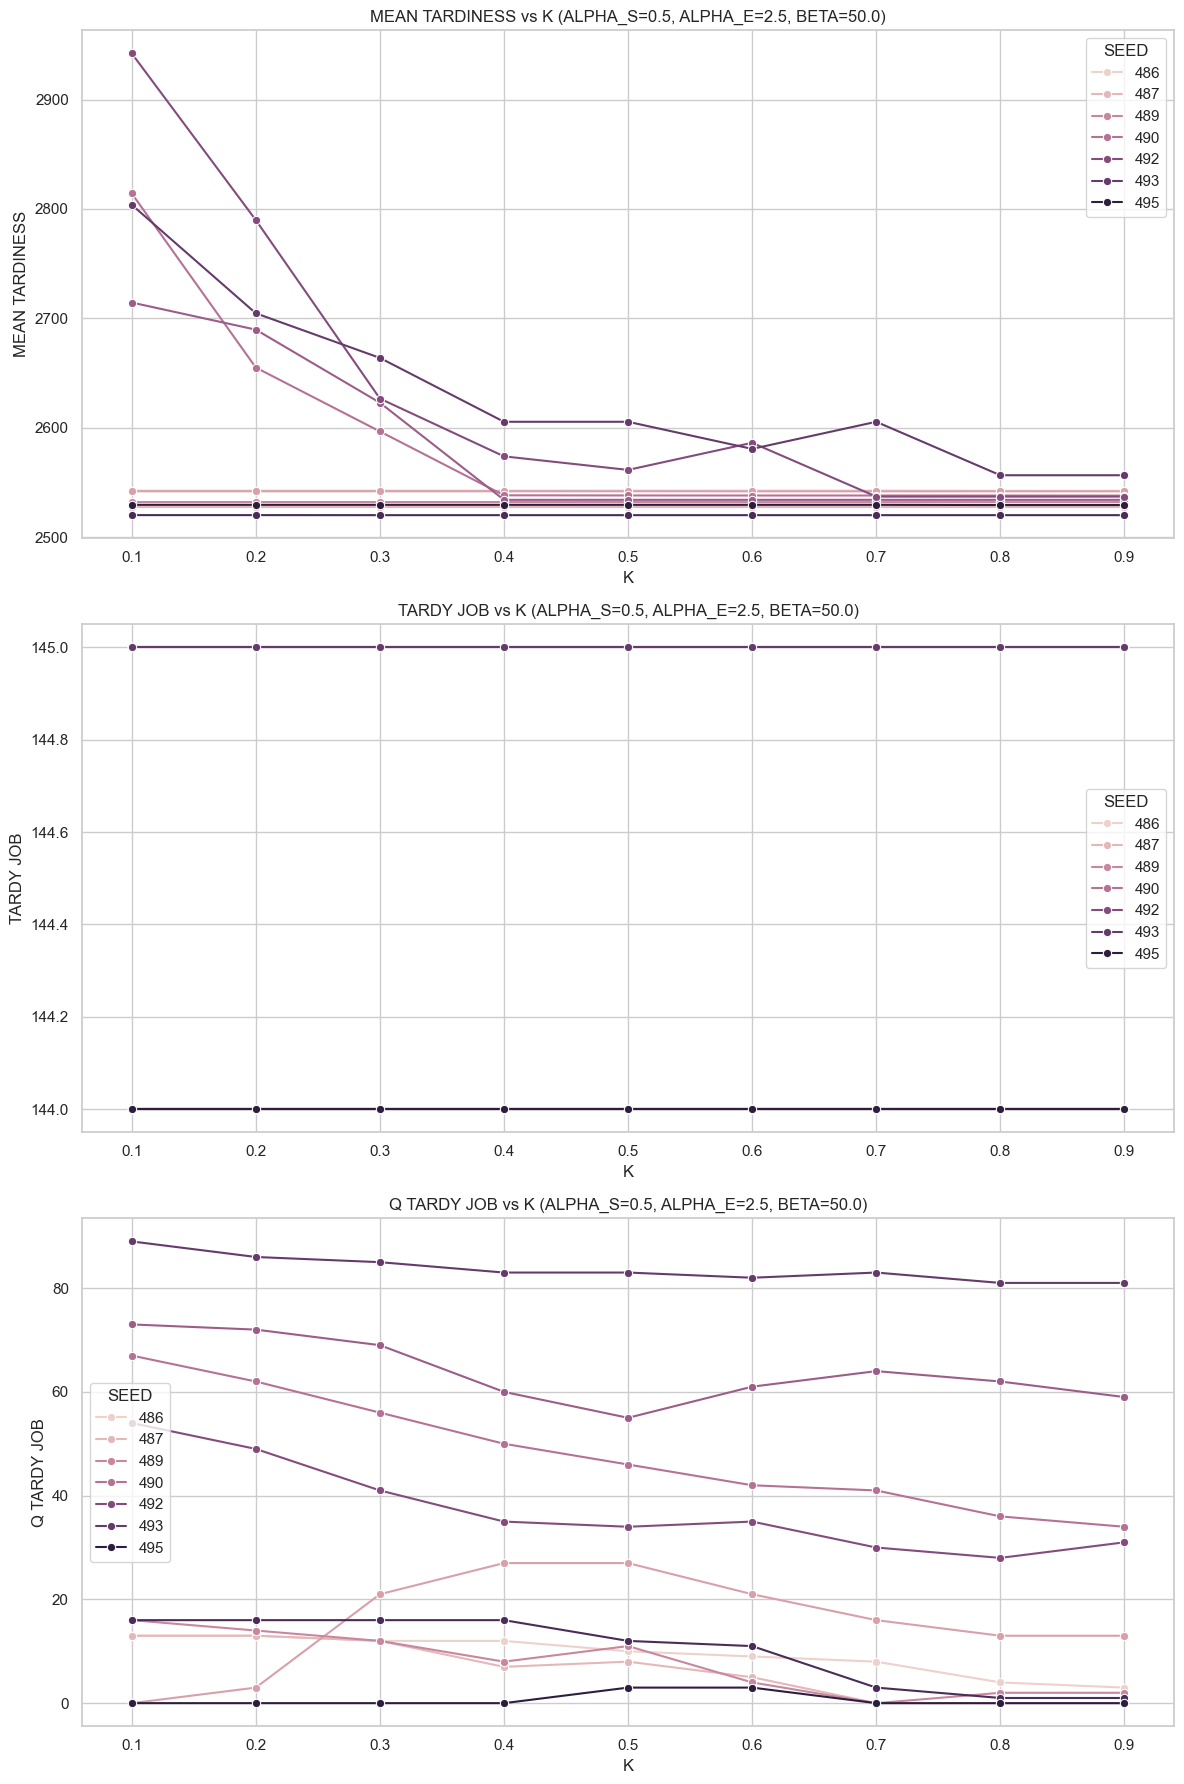

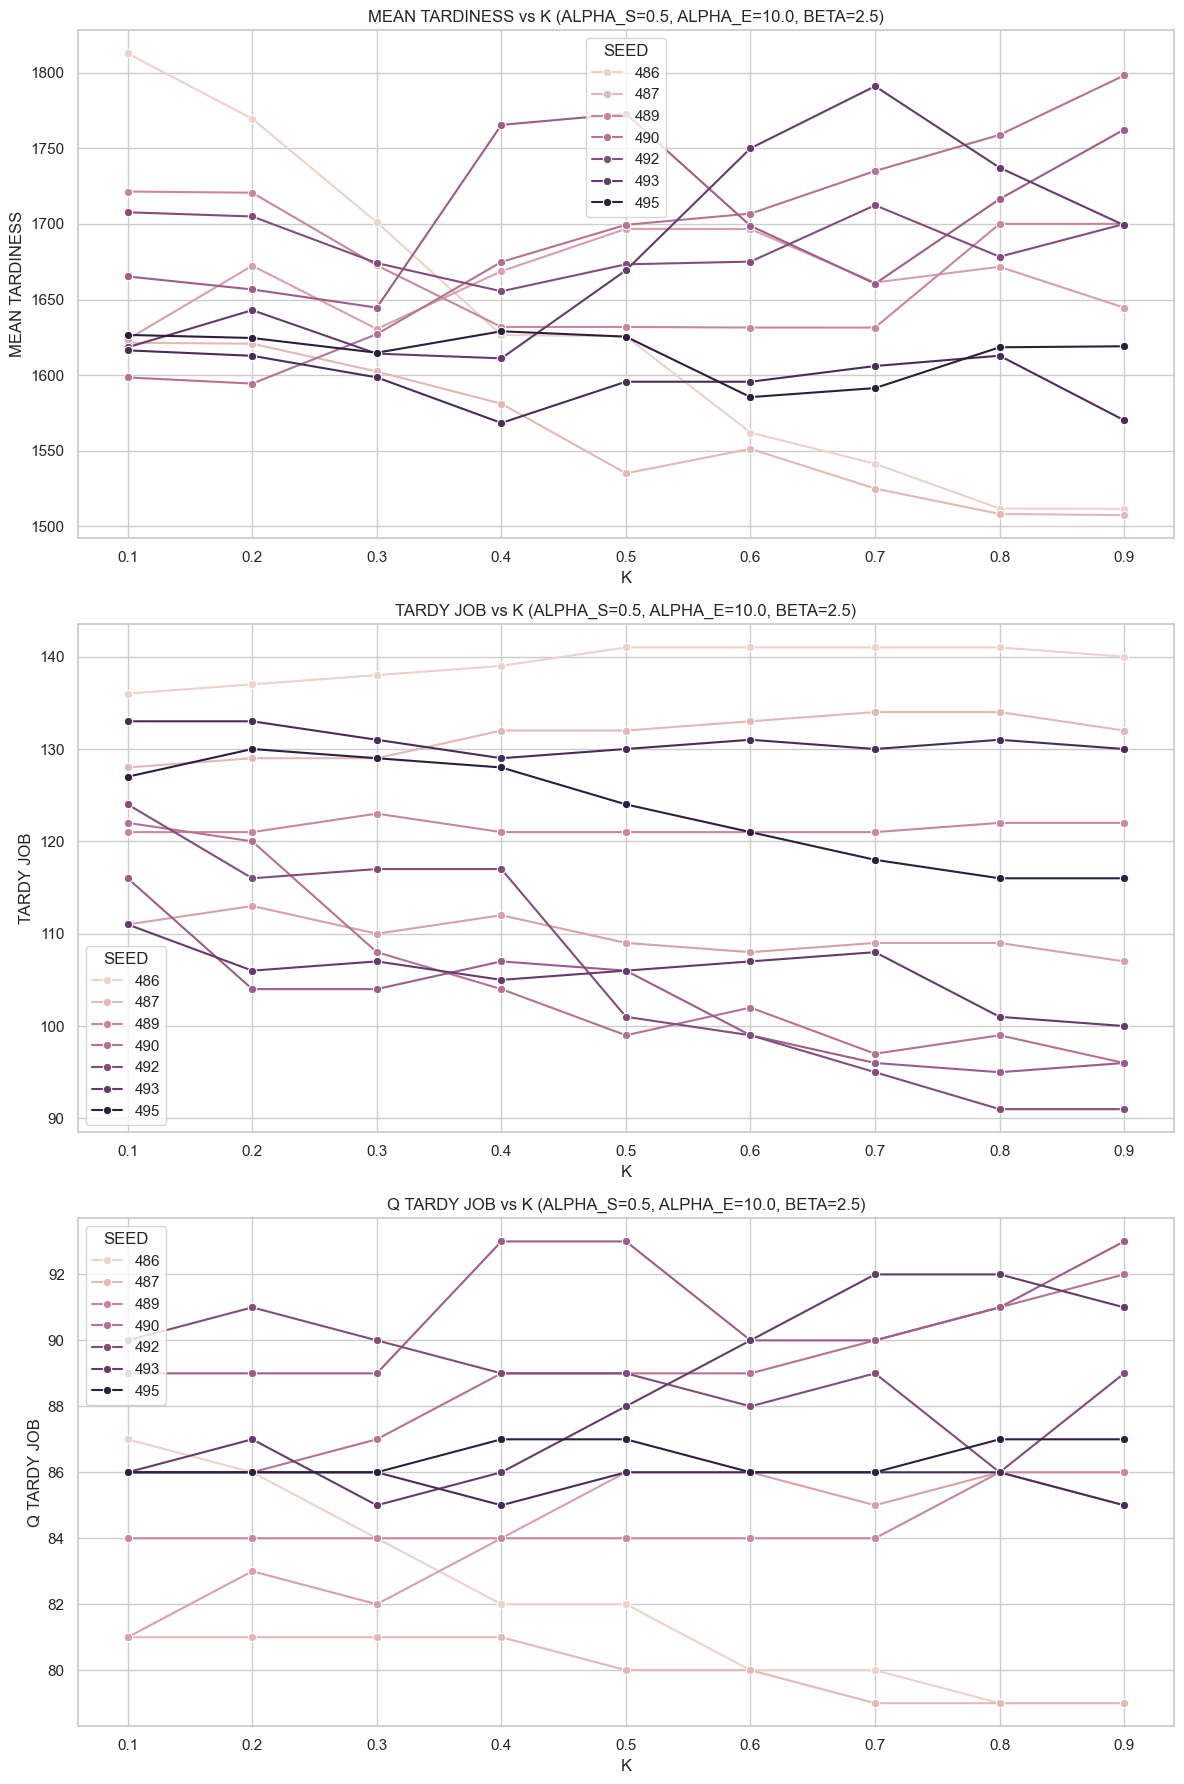

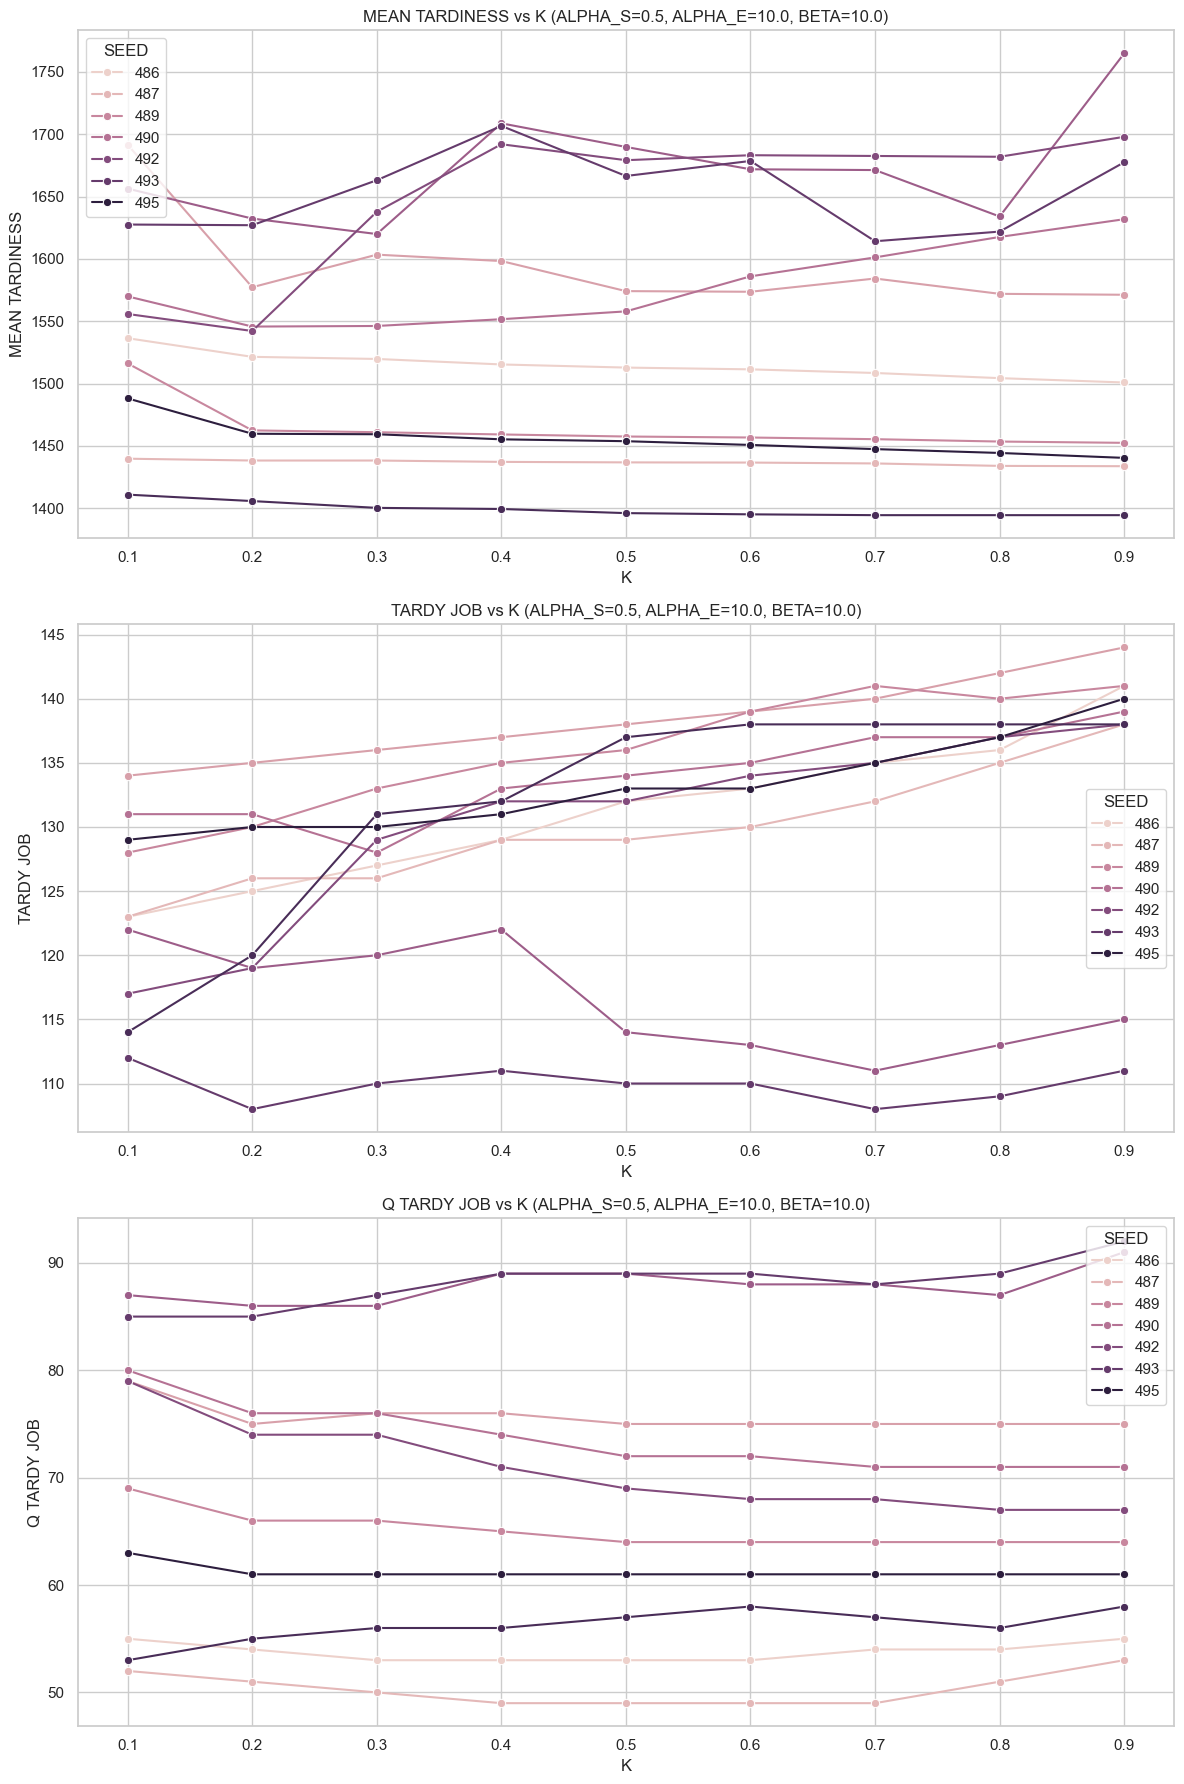

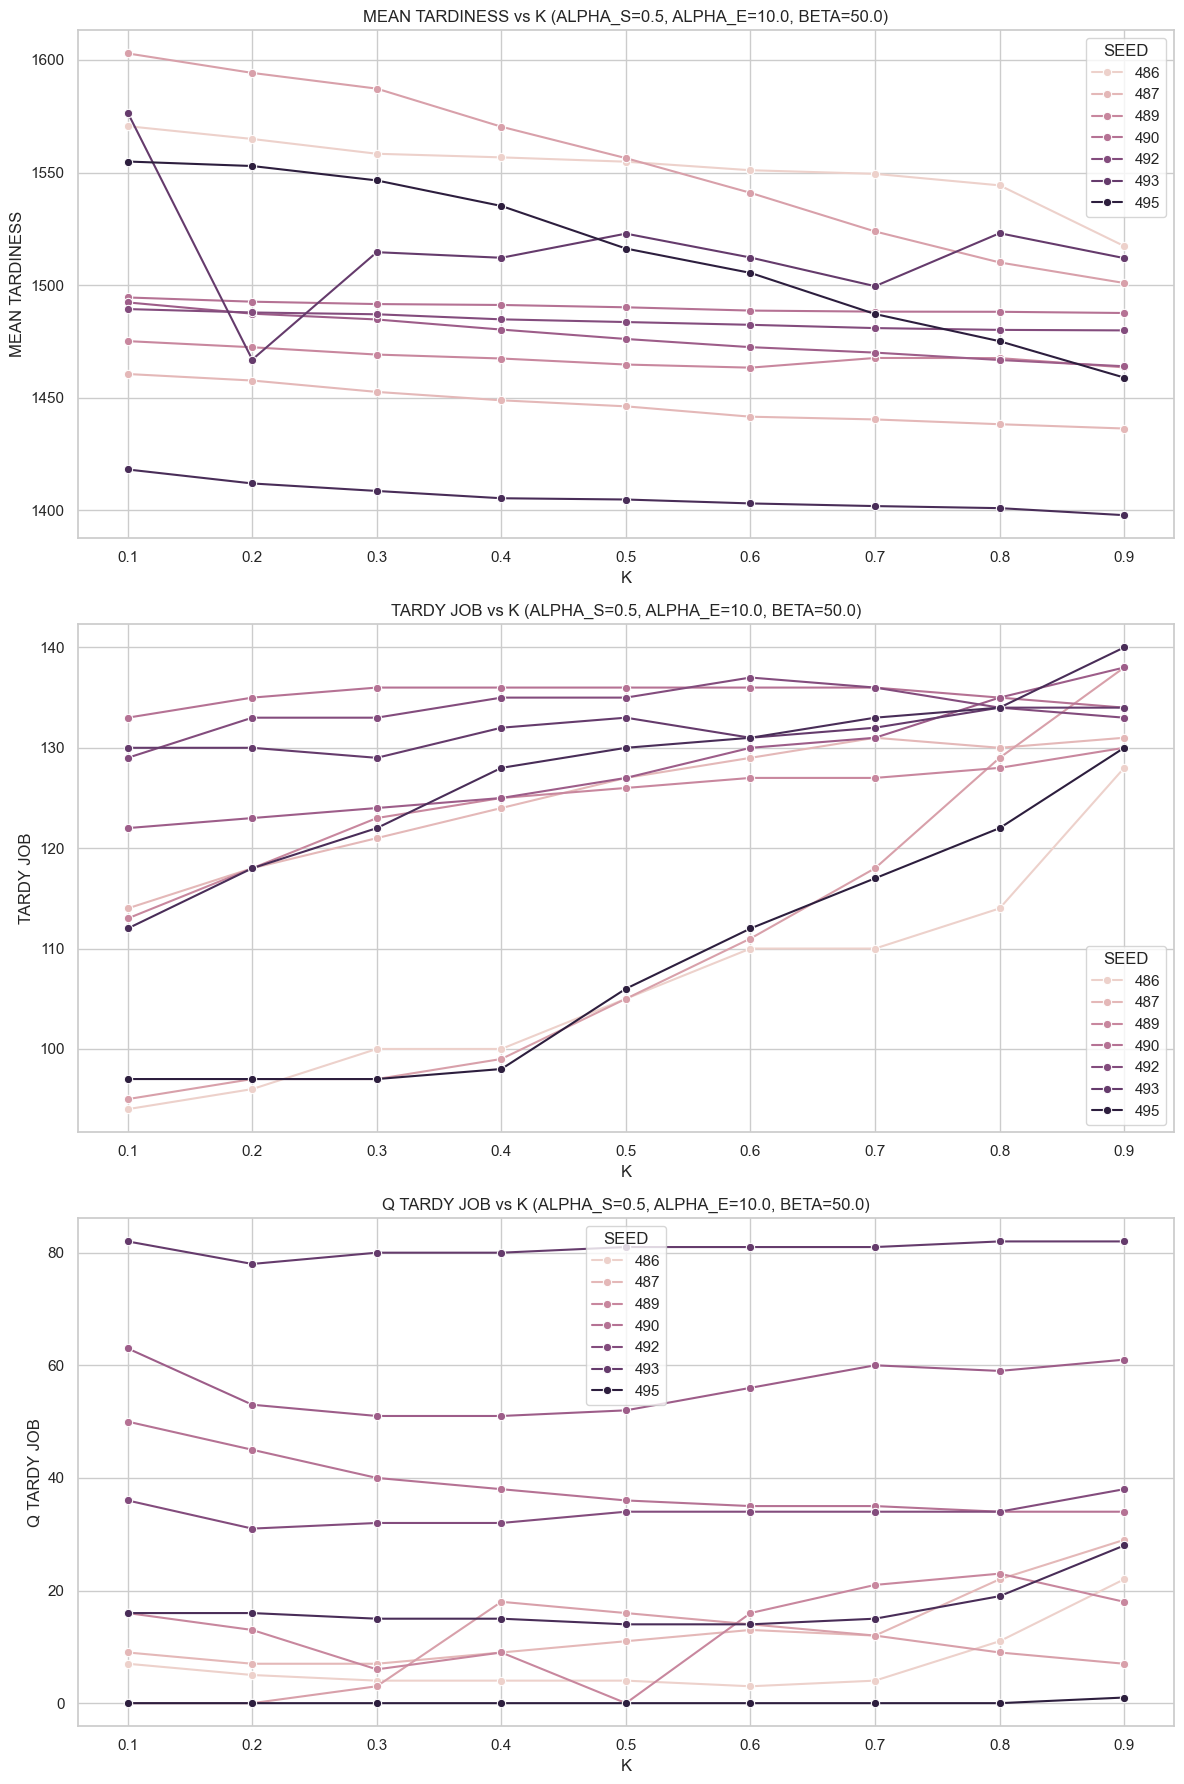

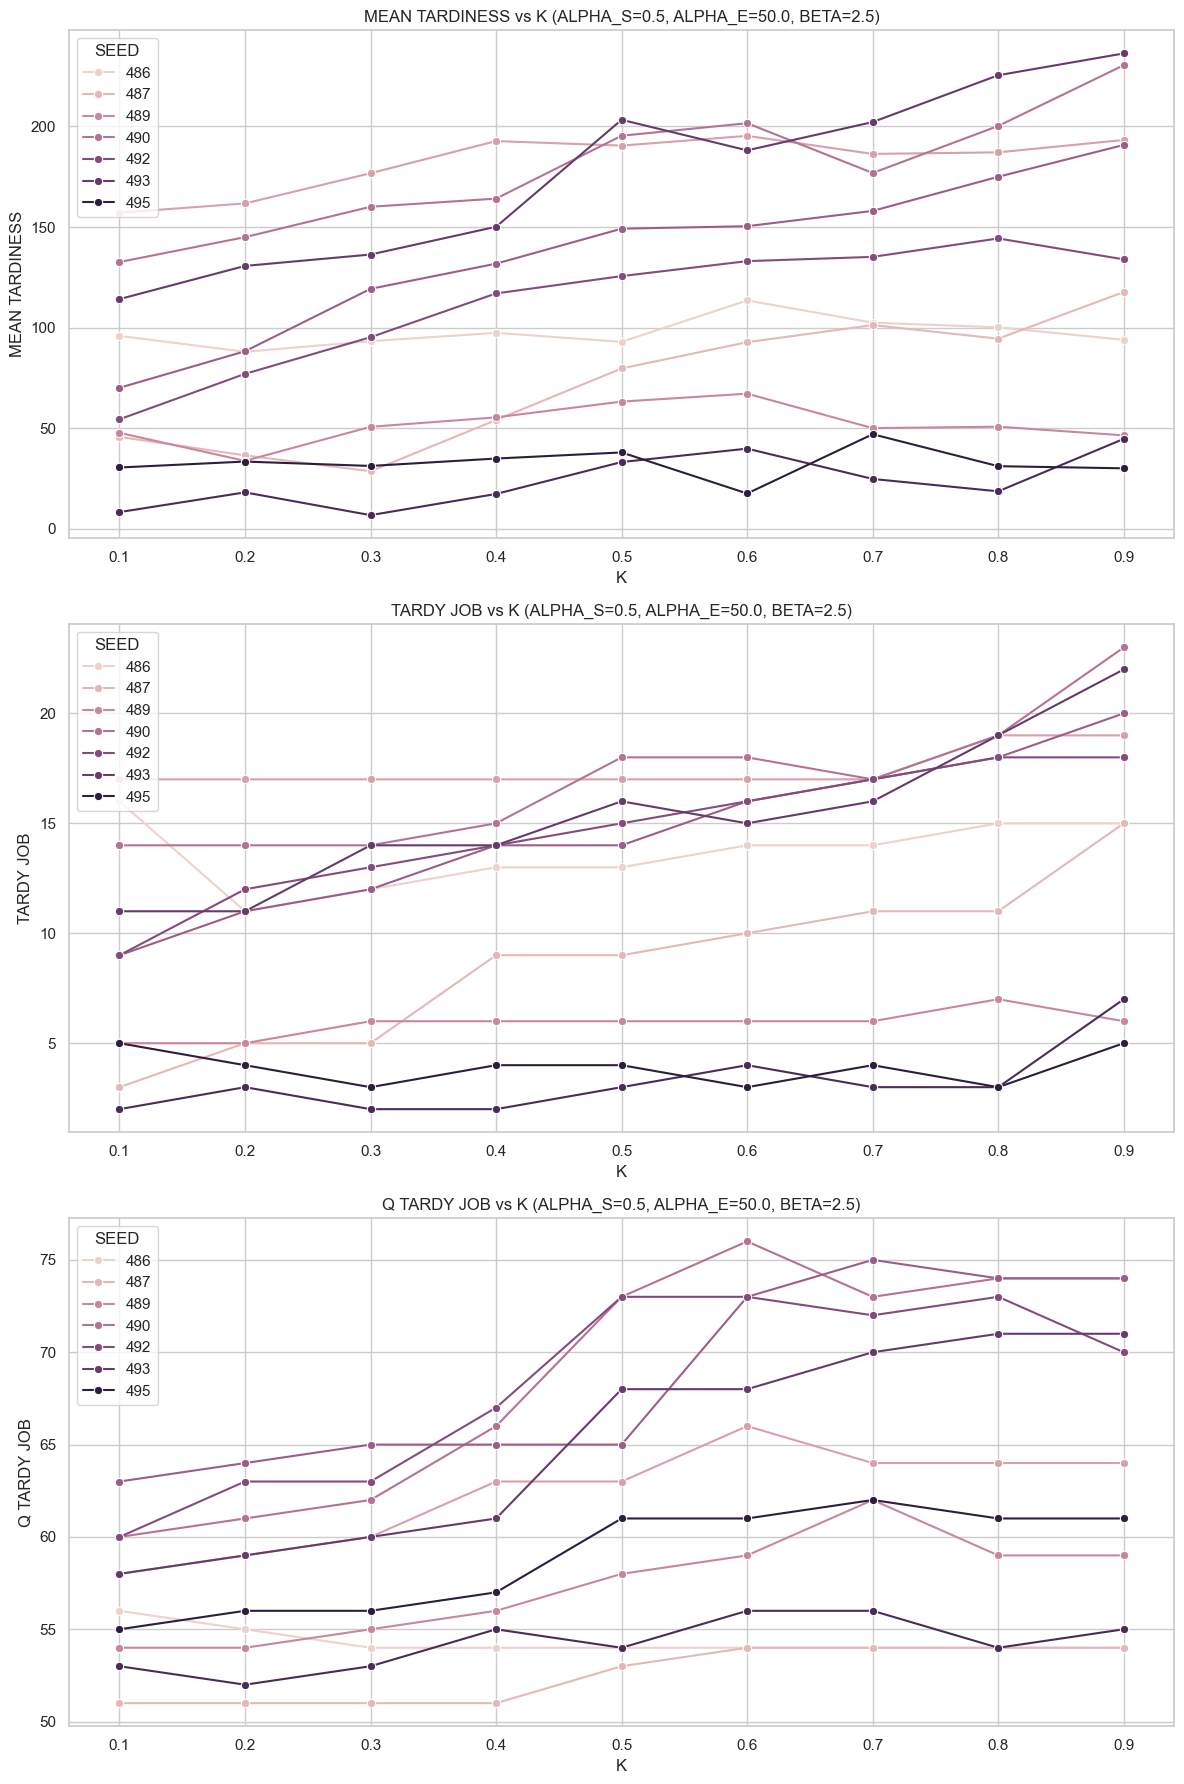

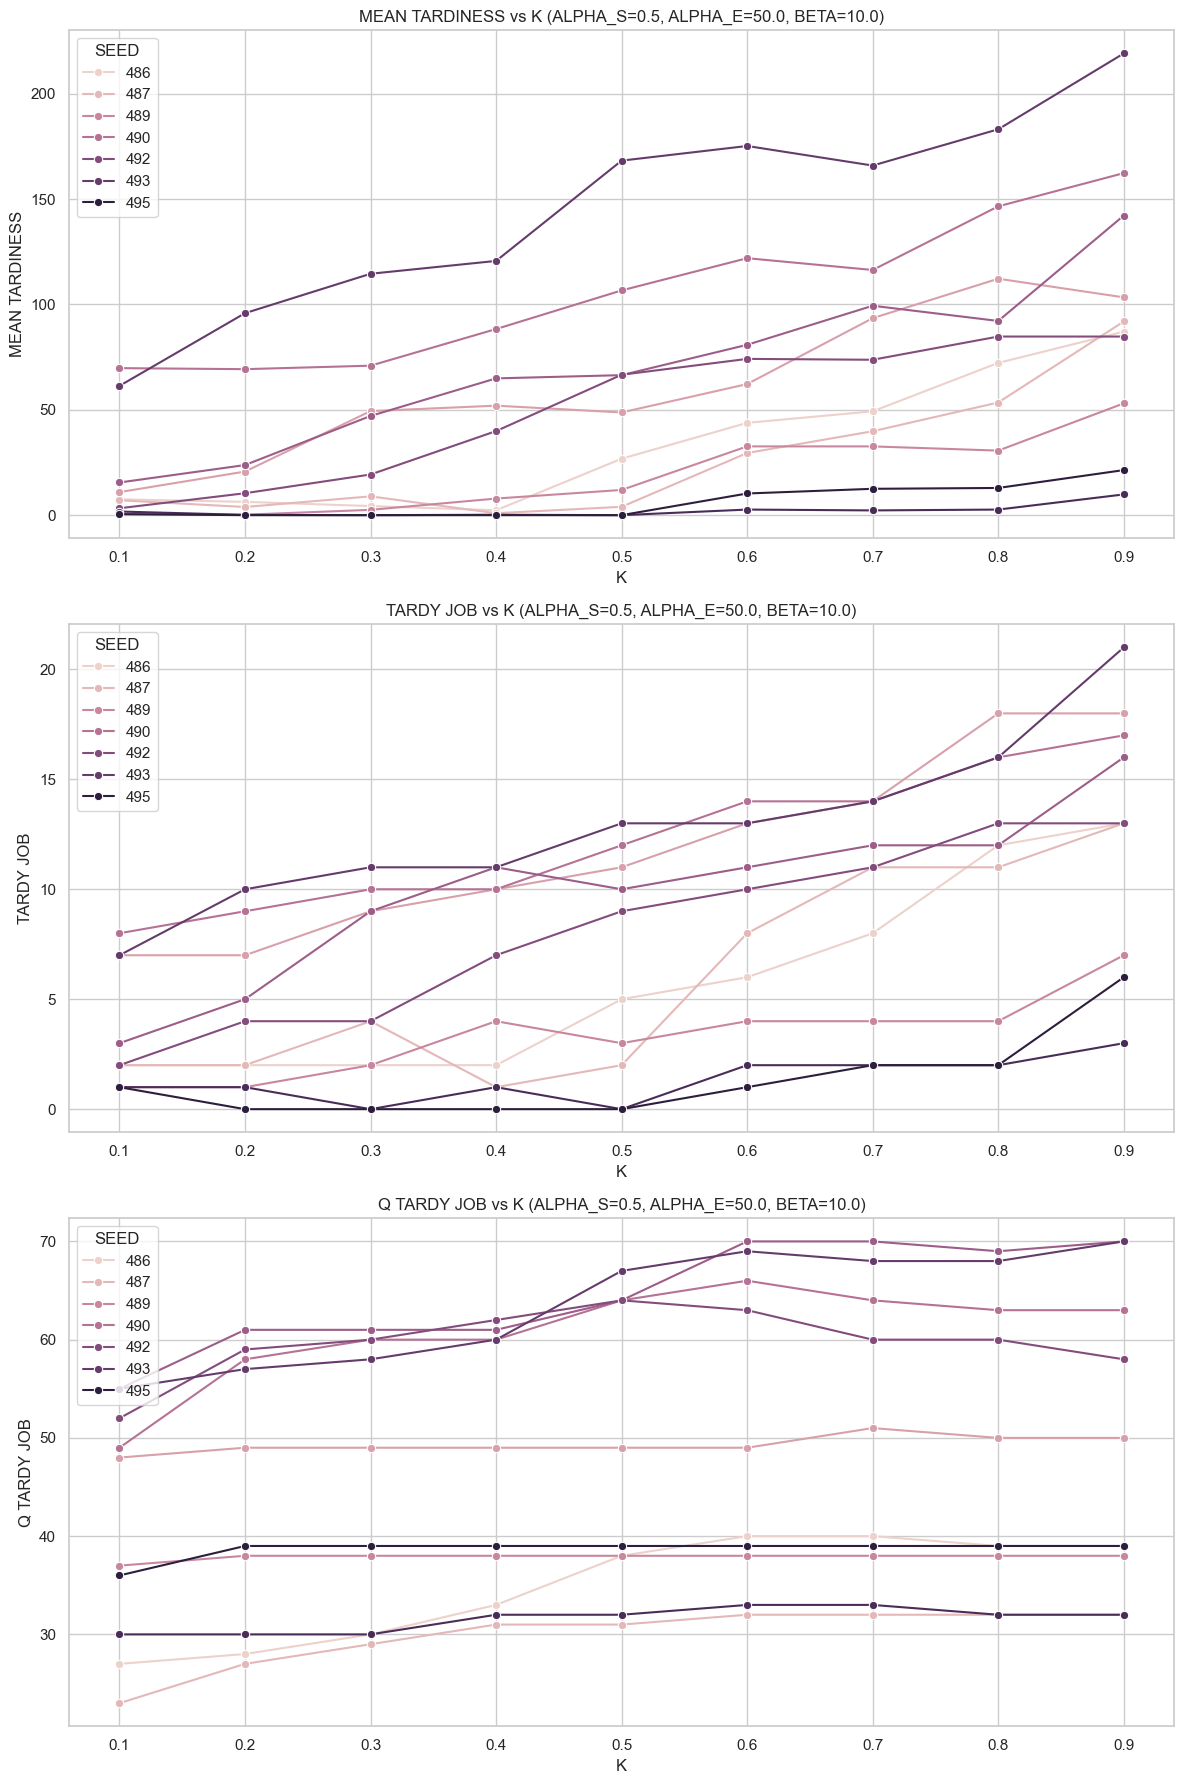

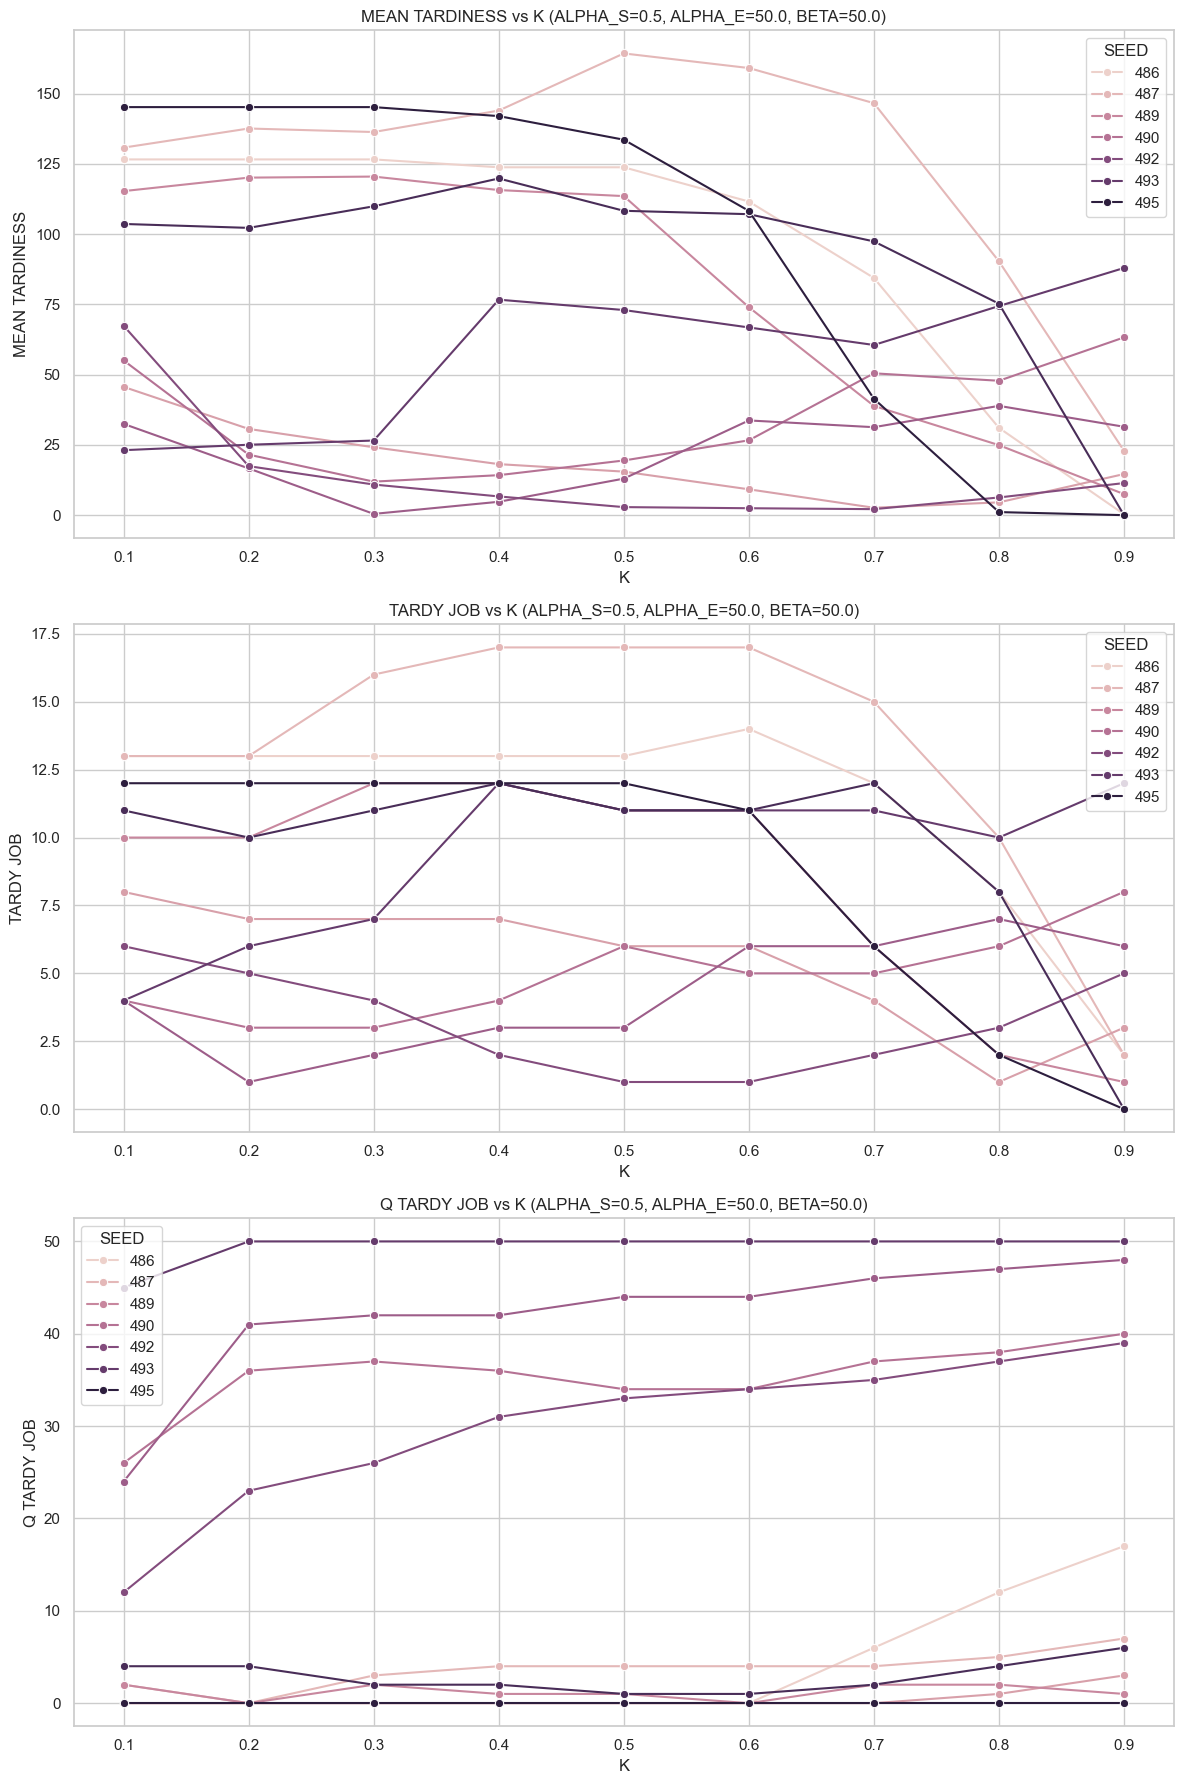

[]

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV 파일 로드
file_path = './simulation_results.csv'
df = pd.read_csv(file_path)

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 문제 타입 유일값 추출 (ALPHA_S, ALPHA_E, BETA 기준)
unique_problem_types = df[['ALPHA_S', 'ALPHA_E', 'BETA']].drop_duplicates()

# 각 문제 타입에 대해 그래프 생성 및 저장
image_files = []

for _, problem in unique_problem_types.iterrows():
    # 특정 문제 타입의 데이터 추출
    problem_df = df[(df['ALPHA_S'] == problem['ALPHA_S']) & 
                    (df['ALPHA_E'] == problem['ALPHA_E']) & 
                    (df['BETA'] == problem['BETA'])]
    
    # 그래프 생성
    fig, axs = plt.subplots(3, 1, figsize=(12, 18))

    for i, metric in enumerate(['MEAN TARDINESS', 'TARDY JOB', 'Q TARDY JOB']):
        sns.lineplot(
            data=problem_df, 
            x='K', 
            y=metric, 
            hue='SEED', 
            ax=axs[i], 
            marker='o'
        )
        
        axs[i].set_title(f'{metric} vs K (ALPHA_S={problem["ALPHA_S"]}, ALPHA_E={problem["ALPHA_E"]}, BETA={problem["BETA"]})')
        axs[i].set_xlabel('K')
        axs[i].set_ylabel(metric)

    # 레이아웃 조정
    plt.tight_layout()
    
    # 그래프 저장
    # image_file = f'./problem_{problem["ALPHA_S"]}_{problem["ALPHA_E"]}_{problem["BETA"]}.png'
    # fig.savefig(image_file)
    # image_files.append(image_file)
    plt.show()
    plt.close(fig)

# 생성된 이미지 파일 목록
image_files
